<a href="https://colab.research.google.com/github/plaban1981/MLZoomCamp2022/blob/main/MLZoomcamp_04_evaluation_homewor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset - Credit Card Data from book "Econometric Analysis".

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-02 11:07:17--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-02 11:07:17 (5.72 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



## Objective
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model **(target column card)**.

## Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
cc_data = pd.read_csv("/content/AER_credit_card_data.csv")
cc_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#### Check for missing values

In [57]:
cc_data.isnull().sum()[cc_data.isnull().sum() > 0]

Series([], dtype: int64)

In [61]:
cat_cols = ['owner','selfemp']
num_cols =  [col for col in cc_data.columns if cc_data[col].dtypes != 'object']

In [62]:
num_cols

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [63]:
cc_data['card'].unique()

array(['yes', 'no'], dtype=object)

## Preparation

* Create the target variable by mapping yes to 1 and no to 0.
* Split the dataset into 3 parts: 
    - train/validation/test with 60%/20%/20% distribution. 
    - Use train_test_split funciton for that with random_state=1.

In [64]:
label_map = {'no':0,'yes':1}

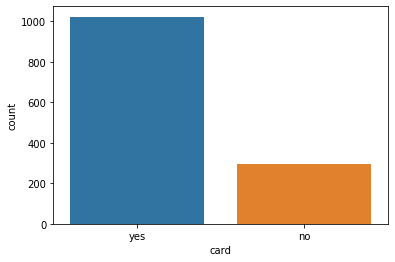

In [65]:
sns.countplot(x='card',data=cc_data)
plt.show()

In [66]:
cc_data['card'] = cc_data['card'].map(label_map)
cc_data['owner'] = cc_data['owner'].map(label_map)
cc_data['selfemp'] = cc_data['selfemp'].map(label_map)

In [130]:
cc_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


## Train Test Validation split

In [68]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest = train_test_split(cc_data,test_size=0.20,random_state=1,stratify=cc_data['card'])
Xtrain,Xval = train_test_split(Xtrain,test_size=0.20,random_state=1,stratify=Xtrain['card'])

In [69]:
print(Xtrain.shape,Xval.shape,Xtest.shape)

(844, 12) (211, 12) (264, 12)


## Question 1

* ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the card variable.
* Use the training dataset for that.
* If your AUC is < 0.5, invert this variable by putting "-" in front

    - (e.g. -df_train['expenditure'])

* AUC can go below 0.5 if the variable is negatively correlated with the target varialble. 
* You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

#### Which numerical variable (among the following 4) has the highest AUC?

* reports
* dependents
* active
* share

In [70]:
ytrain = Xtrain[['card']]
Xtrain = Xtrain.drop('card',axis=1)
#
yval = Xval[['card']]
Xval  = Xval.drop('card',axis=1)
#
ytest = Xtest[['card']]
Xtest = Xtest.drop('card',axis=1)


In [71]:
ytrain['card'].value_counts()

1    654
0    190
Name: card, dtype: int64

In [72]:
ytest['card'].value_counts()

1    205
0     59
Name: card, dtype: int64

In [73]:
yval['card'].value_counts()

1    164
0     47
Name: card, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [75]:
features = num_cols

In [76]:
features

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [80]:
from sklearn.feature_extraction import DictVectorizer
import warnings
warnings.filterwarnings('ignore')
for c in features:
    subset = features.copy()
    subset.remove(c)
    print(subset)
    train_dict = Xtrain[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, ytrain)

    val_dict = Xval[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = roc_auc_score(yval,y_pred)
    print(f"feature : {c} auc_score : {score}")

['age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
feature : reports auc_score : 0.9939024390243902
['reports', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
feature : age auc_score : 0.9939024390243902
['reports', 'age', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
feature : income auc_score : 0.9939024390243902
['reports', 'age', 'income', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
feature : share auc_score : 0.9939024390243902
['reports', 'age', 'income', 'share', 'dependents', 'months', 'majorcards', 'active']
feature : expenditure auc_score : 0.667163985469642
['reports', 'age', 'income', 'share', 'expenditure', 'months', 'majorcards', 'active']
feature : dependents auc_score : 0.9939024390243902
['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'majorcards', 'active']
feature : months auc_score : 0.9939024390243902
['reports', 'age', 'income',

In [79]:
for feature in Xtrain.columns:
  Xtrain_new = Xtrain.copy()
  Xtrain_new = Xtrain_new[[feature]]
  Xval_new = Xval[[feature]]
  lr.fit(Xtrain_new,ytrain)
  ypred = lr.predict(Xval_new)
  auc_score =  roc_auc_score(yval,ypred)
  print(f"feature : {feature} auc_score : {auc_score}")

feature : reports auc_score : 0.6048261546445252
feature : age auc_score : 0.5
feature : income auc_score : 0.5
feature : share auc_score : 0.5
feature : expenditure auc_score : 0.9939024390243902
feature : owner auc_score : 0.5
feature : selfemp auc_score : 0.5
feature : dependents auc_score : 0.5
feature : months auc_score : 0.5
feature : majorcards auc_score : 0.5
feature : active auc_score : 0.5


* Numerical variable reports has the highest AUC Score

## Training the model

In [81]:
select_cols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [82]:
Xtrain = Xtrain[select_cols]
Xval = Xval[select_cols]
Xtest = Xtest[select_cols]

In [83]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(Xtrain,ytrain)
ypred = lr.predict(Xval)

## Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [87]:
auc_score = roc_auc_score(yval,ypred)
print(f'AUC score of validation dataset {round(auc_score,3)}')

AUC score of validation dataset 0.994


## Question 3

* Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them
At which threshold precision and recall curves intersect?

  - 0.1
  - 0.3
  - 0.6
  - 0.8

In [120]:
thresholds = [round(i,2) for i in np.arange(0.0,1.0,0.01).tolist()]

In [121]:
print(thresholds)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [122]:
len(thresholds)

100

In [123]:
from sklearn.metrics import precision_score,recall_score
precisions = []
recalls = []
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in ypred]
  p = precision_score(yval, temp_prediction)
  r = recall_score(yval, temp_prediction)
  precisions.append(p)
  recalls.append(r)


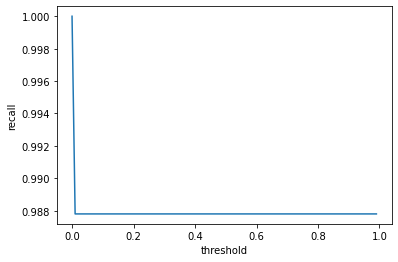

In [124]:
plt.plot(thresholds,recalls)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.show()

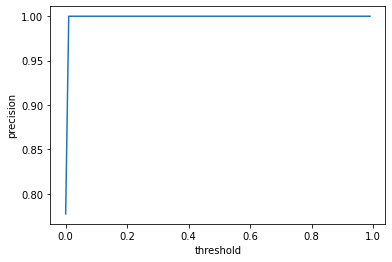

In [125]:
plt.plot(thresholds,precisions)
plt.xlabel('threshold')
plt.ylabel('precision')
plt.show()

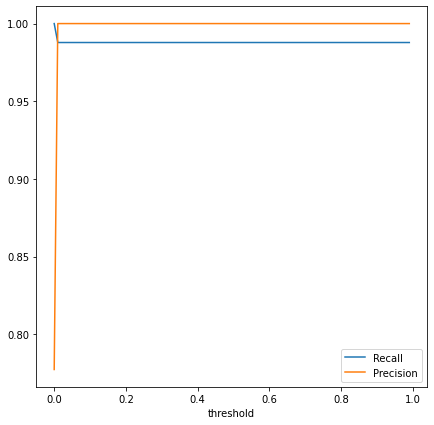

In [126]:
plt.figure(figsize=(7, 7))
plt.plot(thresholds,recalls, label='Recall')
plt.plot(thresholds,precisions,label='Precision')
plt.xlabel('threshold')
plt.legend()
plt.show()


* thresholds at which precision and recall curves intersect is 0.98

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing :

 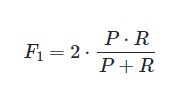

    - Where  p is precision and r is recall.

#### Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

* At which threshold F1 is maximal?

    - 0.1
    - 0.4
    - 0.6
    - 0.7

In [128]:
f1_score = []
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in ypred]
  p = precision_score(yval, temp_prediction)
  r = recall_score(yval, temp_prediction)
  f1 = round((2 * ((p * r) / (p + r))),4)
  f1_score.append(f1)
  print(f"f1 score at threshold {i} : {f1}")

f1 score at threshold 0.0 : 0.8747
f1 score at threshold 0.01 : 0.9939
f1 score at threshold 0.02 : 0.9939
f1 score at threshold 0.03 : 0.9939
f1 score at threshold 0.04 : 0.9939
f1 score at threshold 0.05 : 0.9939
f1 score at threshold 0.06 : 0.9939
f1 score at threshold 0.07 : 0.9939
f1 score at threshold 0.08 : 0.9939
f1 score at threshold 0.09 : 0.9939
f1 score at threshold 0.1 : 0.9939
f1 score at threshold 0.11 : 0.9939
f1 score at threshold 0.12 : 0.9939
f1 score at threshold 0.13 : 0.9939
f1 score at threshold 0.14 : 0.9939
f1 score at threshold 0.15 : 0.9939
f1 score at threshold 0.16 : 0.9939
f1 score at threshold 0.17 : 0.9939
f1 score at threshold 0.18 : 0.9939
f1 score at threshold 0.19 : 0.9939
f1 score at threshold 0.2 : 0.9939
f1 score at threshold 0.21 : 0.9939
f1 score at threshold 0.22 : 0.9939
f1 score at threshold 0.23 : 0.9939
f1 score at threshold 0.24 : 0.9939
f1 score at threshold 0.25 : 0.9939
f1 score at threshold 0.26 : 0.9939
f1 score at threshold 0.27 : 0.

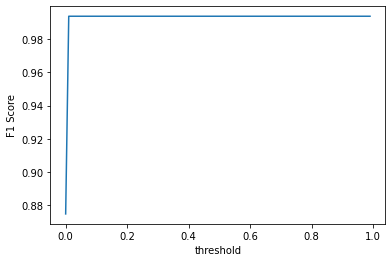

In [129]:
plt.plot(thresholds,f1_score)
plt.xlabel('threshold')
plt.ylabel('F1 Score')
plt.show()

* F1 is maximal at threshold 0.1

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

* KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters:    
    - LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

* How large is standard devidation of the AUC scores across different folds?

    - 0.003
    - 0.014
    - 0.09
    - 0.24

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

In [131]:
cc_data[select_cols].head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner,selfemp
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0


In [134]:
from sklearn.model_selection import KFold
from sklearn import metrics
X = cc_data[select_cols].values
y = cc_data['card'].values
scores=[]
kf = KFold(n_splits=5, shuffle=True, random_state=1)
k =0
for train_index, test_index in kf.split(X):
  k +=1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
  lr.fit(X_train,y_train)
  pred = lr.predict(X_test)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
  auc = metrics.auc(fpr, tpr)
  scores.append(auc)
  print(f"AUC score for Fold {k} : {auc}")

AUC score for Fold 1 : 0.9924242424242424
AUC score for Fold 2 : 0.9845132743362832
AUC score for Fold 3 : 0.9896907216494846
AUC score for Fold 4 : 0.9881516587677726
AUC score for Fold 5 : 0.977775287613925


In [137]:
print(f"How large is standard devidation of the AUC scores across different folds : {round(np.std(scores),3)}")

How large is standard devidation of the AUC scores across different folds : 0.005


## Question 6

* Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 1, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

* Which C leads to the best mean score?

    - 0.01
    - 0.1
    - 1
    - 10

* If you have ties, select the score with the lowest std. 
* If you still have ties, select the smallest C

In [143]:
c =  [0.01, 0.1, 1, 10]
c_dict = {}
for cval in c:
  scores=[]
  kf = KFold(n_splits=5, shuffle=True, random_state=1)
  k =0
  for train_index, test_index in kf.split(X):
    k +=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='liblinear', C=cval, max_iter=1000)
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    auc = metrics.auc(fpr, tpr)
    scores.append(auc)
    print(f"AUC score for Fold {k} and C value {cval}: {auc}")
  mean = np.mean(scores)
  std = np.std(scores)
  print(f"mean scores {round(mean,3)} for C value : {cval}")
  print(f"std scores {round(std,3)} for C value : {cval}")
  c_dict[cval] = [{'mean_score':round(mean,3),'std_score':round(std,3)}]

AUC score for Fold 1 and C value 0.01: 0.9924242424242424
AUC score for Fold 2 and C value 0.01: 0.9845132743362832
AUC score for Fold 3 and C value 0.01: 0.9896907216494846
AUC score for Fold 4 and C value 0.01: 0.9881516587677726
AUC score for Fold 5 and C value 0.01: 0.9845360824742269
mean scores 0.988 for C value : 0.01
std scores 0.003 for C value : 0.01
AUC score for Fold 1 and C value 0.1: 0.9924242424242424
AUC score for Fold 2 and C value 0.1: 0.9845132743362832
AUC score for Fold 3 and C value 0.1: 0.9896907216494846
AUC score for Fold 4 and C value 0.1: 0.9881516587677726
AUC score for Fold 5 and C value 0.1: 0.9798670252502616
mean scores 0.987 for C value : 0.1
std scores 0.004 for C value : 0.1
AUC score for Fold 1 and C value 1: 0.9924242424242424
AUC score for Fold 2 and C value 1: 0.9845132743362832
AUC score for Fold 3 and C value 1: 0.9896907216494846
AUC score for Fold 4 and C value 1: 0.9881516587677726
AUC score for Fold 5 and C value 1: 0.977775287613925
mean sc

In [144]:
c_dict

{0.01: [{'mean_score': 0.988, 'std_score': 0.003}],
 0.1: [{'mean_score': 0.987, 'std_score': 0.004}],
 1: [{'mean_score': 0.987, 'std_score': 0.005}],
 10: [{'mean_score': 0.983, 'std_score': 0.009}]}

* The C value that leads to the best mean score is 0.01